<a href="https://colab.research.google.com/github/sbborusu/530pm_Agentic_Ai_Batch_7thApril/blob/main/KDE_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

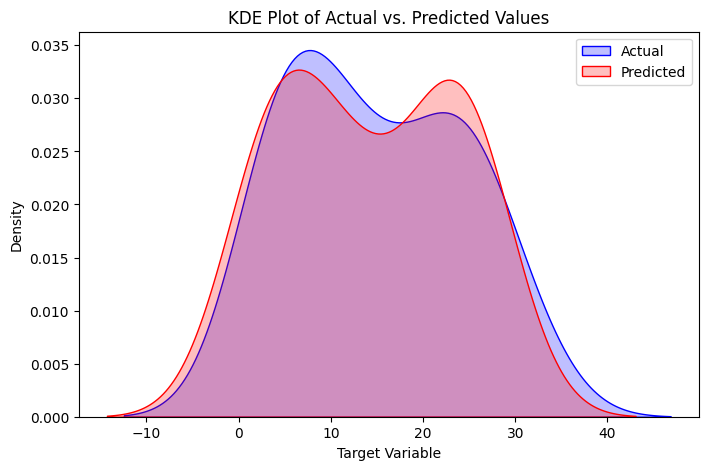

In [13]:
import numpy as npy
import pandas as pds
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
# Generating Sample Data
npy.random.seed(42)
x = npy.random.rand(100) * 10
''' That below one line of code is essentially synthetically generating a dataset that follows a linear relationship using the formula:
         y=mx+c+noise
    Here’s what’s happening:
    1. x = np.random.rand(100) * 10 -> Creates 100 random values for the independent variable xxx in the range [0,10]
    2. y = 3 * x + np.random.normal(0, 3, 100)
      a. 3 * x → This is the linear part (slope m=3m = 3m=3, intercept c=0).
      b. np.random.normal(0, 3, 100) → Adds Gaussian noise with mean 0 and standard deviation 3 to simulate real-world variability.
    Why do this?
    1. It's a common way to simulate data for testing regression models.
    2. Without noise, all points would lie perfectly on the line y=3xy = 3xy=3x, which is unrealistic.
    3. Noise makes the dataset more like real-world data where measurements aren’t perfect.
    Conclusion:
    1. We are using the linear regression equation y=mx+cy = m x + cy=mx+c to generate target labels, and then adding noise to make it realistic.
'''
y = 3 * x + npy.random.normal(0, 3, 100)
data = pds.DataFrame({'X': x, 'Y': y})
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(data[['X']], data['Y'], test_size=0.2, random_state=42)
# Training a Model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Plotting KDE for Observed vs. Predicted Values
plt.figure(figsize=(8, 5))
sns.kdeplot(y_test, label='Actual', fill=True, color='blue')
sns.kdeplot(y_pred, label='Predicted', fill=True, color='red')
plt.xlabel('Target Variable')
plt.ylabel('Density')
plt.title('KDE Plot of Actual vs. Predicted Values')
plt.legend()
plt.show()

## Interpretation of the above KDE Plot
1. Overlap Between Distributions: The two curves have a significant overlap, indicating that the model has captured the general distribution of the actual target values reasonably well. However, the predicted values slightly deviate from the actual values in some regions.

2. Peak Differences (Mode Shifts): The blue (actual) curve peaks slightly higher than the red curve, meaning that the actual values are more concentrated around certain values. The red (predicted) curve has a second peak, suggesting that the model may be slightly misestimating certain ranges of the target variable.

3. Spread of the Distributions: The actual values (blue) seem to have a wider spread, indicating more variation in real-world values.The predicted values (red) appear to be narrower, which suggests the model might be slightly underestimating variance (a sign of over-smoothing or bias).

4. Tails of the Distributions: The tails of the predicted values closely follow the actual values, meaning the model does not generate extreme outliers beyond what was observed in the data. If there was a significant mismatch in the tails, it could indicate that the model struggles with extreme cases.